# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

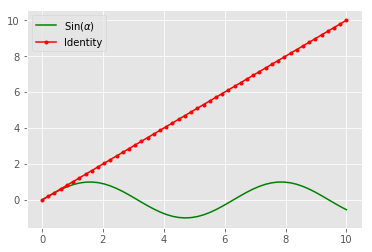

In [100]:
import numpy as np

X = np.linspace(0, 10, 50)
Y = np.sin(X)

plt.plot(X, Y, c='green', label = r'Sin($\alpha$)')
plt.plot(X, X, 'r.-', label = 'Identity');
plt.legend(loc='best');

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


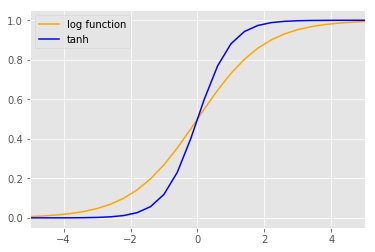

In [55]:
xlim_1 = -100
xlim_r = 100
N = 500

X = np.linspace(xlim_1, xlim_r, N)
Y1 = np.exp(X) / (1 + np.exp(X))
Y2 = (np.tanh(X) + 1) / 2


plt.plot(X, Y1, c='orange', label = 'log function')
plt.plot(X, Y2, c ='blue', label = 'tanh')
plt.legend(loc='best');

#Utilizamos el plt.xlim para hacer el plot en el lugar donde nos interesa, hacemos un zoom en el rango que queremos
plt.xlim([-5, 5]);

### Scatter plots

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


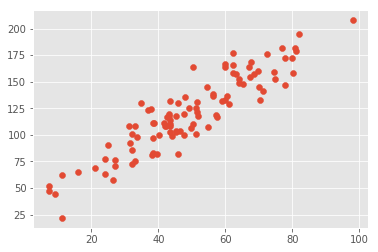

In [56]:
X2 = np.random.randn(100) * 20 + 50
Y2 = 2 * X2 + 20

jitter = np.random.randn(100) * 15

Y2_randomized = Y2 + jitter
plt.scatter(X2, Y2_randomized);

**Ejercicio:**
Repite el plot anterior con un line plot convencional.

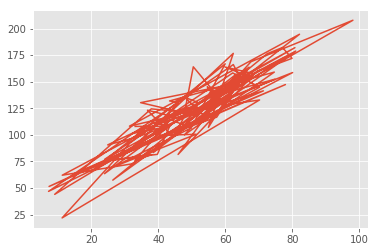

In [58]:
#This is what happens if you make a line plot of unsorted data:
plt.plot(X2,Y2_randomized);

### Bar plots

Do not confuse with histograms! 

https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/#698fd8d46d77

* **Bar plots:** representar variables categóricas.

* **Histogram:** mostrar distribución de datos repartidos usando bins.

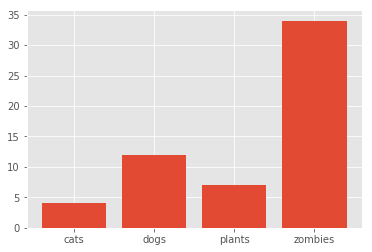

In [64]:
#Ejemplo de bar plots:
X3 = ['cats', 'dogs', 'plants','zombies'];
Y3 = [4, 12, 7,34];
#plt.bar(X3, Y3)
plt.bar(range(4), Y3);
plt.xticks(range(4), X3);
#xticks sirve para poner un nombre en el eje x. Imaginemos que X3 estuviese creada como una lista [0, 1, 2, 3]
#a la hora de hacer plt.xtics le decimos como sale

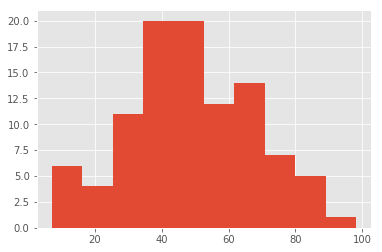

In [60]:
#Ejemplo con histograma utilizando los datos X2 (una distribución aleatoria)
plt.hist(X2);

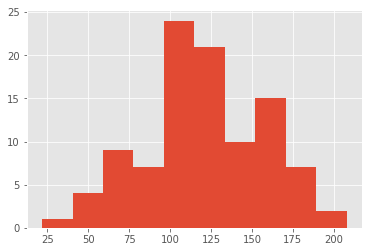

In [67]:
plt.hist(Y2_randomized);

**Ejercicio:**
Vuelve a generar X2 cambiando el número de puntos y el número de bins hasta obtener un histograma que se aproxime a la distribución gaussiana dada a continuación:


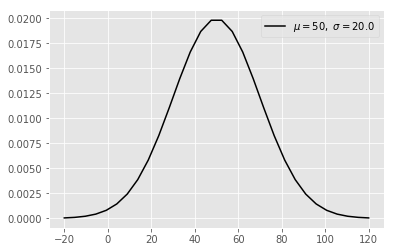

In [68]:
from scipy.stats import norm
#Gaussian distribution parameters
nbins=30
mu=50;sigma=20;
dist= norm(mu, sigma)
#number of bins
xnorm = np.linspace(-20, 120, nbins)#used to plot the gaussian distribution
ynorm = dist.pdf(xnorm);
plt.plot(xnorm, ynorm, c='black',label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma));
plt.legend();

In [86]:
N = 10000
nb = 30
X2 = np.random.randn(N) * 20 + 50

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


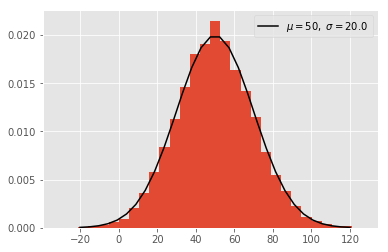

In [92]:
plt.hist(X2, bins = nb, normed = 1)
plt.plot(xnorm, ynorm, c='black',label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma));
plt.legend();

**Solución**.

Primero representamos los datos iniciales en forma de histograma y seleccionados *density=True* para mostrar la pdf de nuestra distribución.

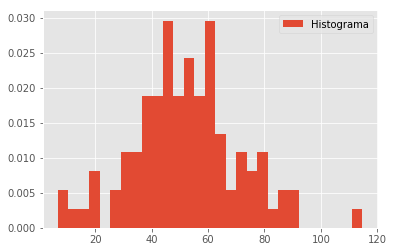

In [88]:
N=100#number of points
#Random data generation
X5 = np.random.randn(N) * 20 + 50
mybins=np.linspace(X5.min(),X5.max(),nbins)
plt.hist(X5,bins=mybins,density=True,label='Histograma');
plt.legend();

Cuando tenemos pocos puntos la distribución no se parece mucho a una gaussiana... Pero si vamos subiendo N:

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


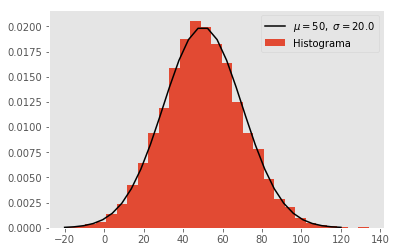

In [97]:
N=10000#number of points
#Random data generation
X5 = np.random.randn(N) * 20 + 50
mybins=np.linspace(X5.min(),X5.max(),nbins)
#plt.hist(X5,bins=mybins,density=True,label='Histograma');
plt.hist(X5,bins=mybins,normed=1,label='Histograma');
plt.plot(xnorm, ynorm, c='black',label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma));
plt.legend();
plt.grid('off')

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

#### Exercise

Write a function following the recommended signature for custom plotting functions.

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

### `plt.subplots()`

(2, 2)

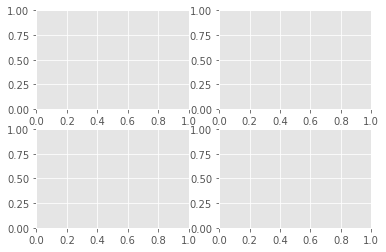

In [98]:
figure, axeses = plt.subplots(2,2)

axeses.shape

In [111]:
X = np.linspace(-7, 7, 50)
Y = np.exp(X) / (1 + np.exp(X))
X2 = np.random.randn(100) * 20 + 50
Y2 = 2 * X2 + 20

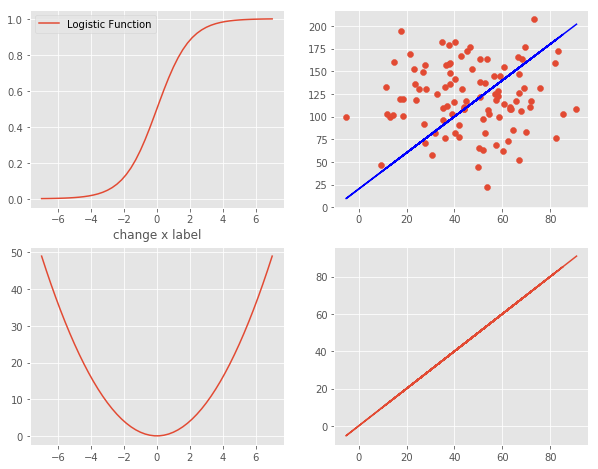

In [117]:
figure, axs = plt.subplots(2,2)

axs[0,0].plot(X, Y)
axs[0,1].scatter(X2, Y2_randomized)
axs[0,1].plot(X2, Y2, c='blue')
axs[1,0].plot(X, X ** 2)
axs[1,1].plot(X2, X2)

axs[0,0].set_xlabel('change x label')

figure.set_size_inches(10,8)
axs[0,0].legend(['Logistic Function'])

In [115]:
#Ejercicio opcional, como hacer que haya más espacios entre los subplots para que así pueda ver mejor los labels

### Sharing axis

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

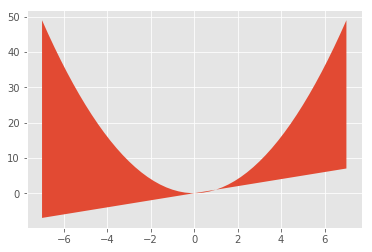

In [133]:
plt.fill_between(X, X, X ** 2)
#plt.xlim([-5, 5]);

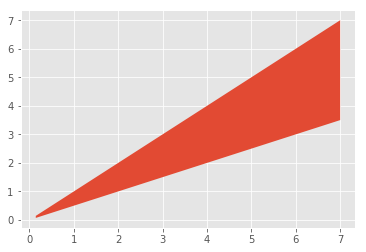

In [131]:
plt.fill_between(X, X, X / 2, where = X > 0)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



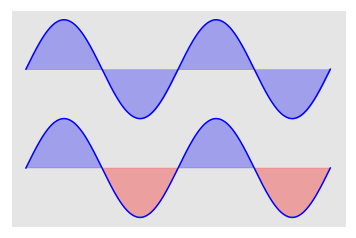

In [168]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint = True)
Y = np.sin(2*X)

plt.plot(X, Y+1, color = 'blue', alpha = 1.00)
plt.plot(X, Y-1, color = 'blue', alpha = 1.00)

#Quitar grid
plt.grid(False)

#Quitar los números de los ejes
plt.xticks([])
plt.yticks([])

#Llenar de azul para valores mayores y menores que 1
plt.fill_between(X, Y+1, 1, color = 'blue', alpha = 0.3)

#Llenar de azul para valores mayores de 1 en azul y menores en rojo
plt.fill_between(X, Y-1, -1, where = Y-1 > -1, color = 'blue', alpha = 0.3)
plt.fill_between(X, Y-1, -1, where = Y-1 < -1, color = 'red', alpha = 0.3)

# Solución

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color (utilizando una distribucion tanh2) and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

1024

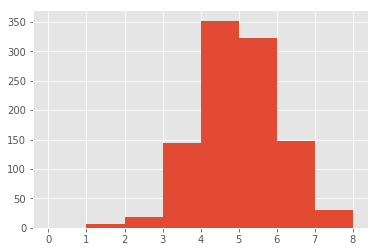

In [208]:
antiguedad = np.random.normal(5,1,n)
plt.hist(antiguedad, bins = [0,1,2,3,4,5,6,7,8]);
len(antiguedad)

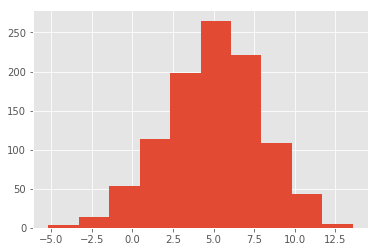

In [213]:
saldo = np.random.normal(5,3,n)
plt.hist(saldo);

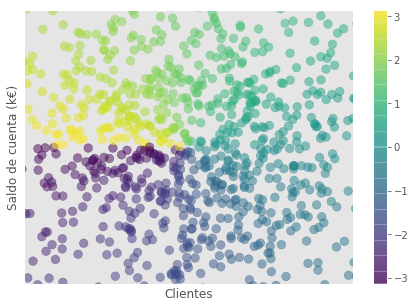

In [235]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y, X)

#Si = np.abs(np.sin(X))*75
Si = 75

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.scatter(X, Y, s = Si, c = T, alpha=0.5)
plt.colorbar()

plt.xlabel("Clientes")
plt.ylabel("Saldo de cuenta (k€)")

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.xticks([])
plt.yticks([])
plt.grid()

plt.show()

# Solucion

In [ ]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)
#Si= np.abs(np.sin(X))*75
Si=75
plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=Si, c=T, alpha=0.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

### Markers and linestyles

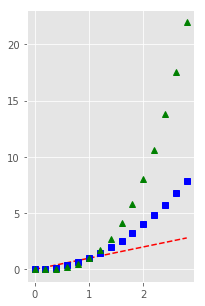

In [241]:
figure, axes = plt.subplots(1,1)


X = np.arange(0, 3, .2)
Y1 = X
Y2 = X ** 2
Y3 = X ** 3

axes.plot(X, Y1, 'r--')
axes.plot(X, Y2, 'bs')
axes.plot(X, Y3, 'g^')
figure.set_size_inches(3,5)

plt.show()

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



## Legends

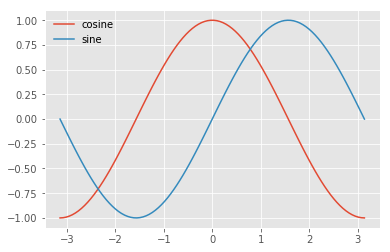

In [244]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

## Ticks, tick labels, limits

### Ticks

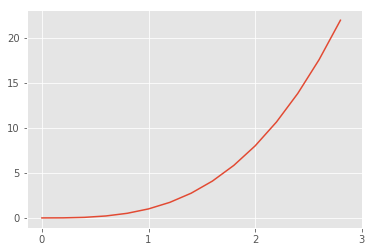

In [245]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))

plt.show()

### Tick labels

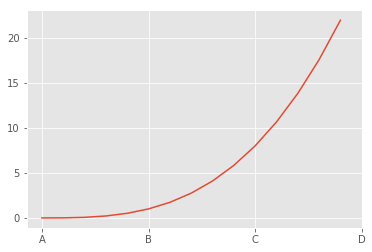

In [246]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))
axes.set_xticklabels(list('ABCD'))

plt.show()

### Limits

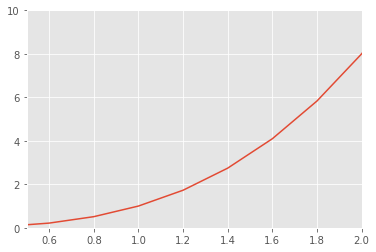

In [247]:
plt.plot(X, Y)

axes = plt.gca()
axes.set_xlim((0.5,2))
axes.set_ylim((0,10))

plt.show()

# Ejercicio:

Crea una figura que muestre la función $\sin(x)$ y $\exp(x)$, entre $-\pi$ y $\pi$, con diferentes estilos para cada función (lineas con puntos en azul y lineas discontinuas en rojo). La figura debe incluir leyenda explicativa y nombres de ejes:
* xlabel = '$\alpha$ (rad)'
* ylabel = 'f'

Sin ningún tipo de grid.
Por último, la figura debe sombrear el área entre las dos curvas.

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

In [ ]:
import seaborn as sns

sns.regplot(X2, Y2_randomized);

### Histogram

In [ ]:
sns.distplot(X2)

In [ ]:
sns.distplot(X5)

"kde" stands for "[kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)"

In [ ]:
sns.kdeplot(X5)

In [ ]:
sns.jointplot(X2, Y2_randomized)

In [ ]:
sns.jointplot(X2, Y2_randomized, kind='kde')

In [ ]:
import pandas as pd

tips = pd.read_csv('tips.csv')
tips.head()

Un plot muy útil ara representar distribución de datos por categoría (valor de variable).

In [ ]:
sns.boxplot(data=tips, x='sex', y='tip')

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

## Categorical data

https://seaborn.pydata.org/tutorial/categorical.html

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

### Scatterplot

### Controlling line/marker properties

https://bokeh.pydata.org/en/latest/docs/reference/palettes.html

#### Selected and non-selected glyphs

#### Tools

https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

#### Exercise

Perform a linear regression on a set of data generated with `generate_points()`. Plot both the points and the line of best fit with Bokeh.

#### Bonus 

Plot the residuals on the same graph.

**Hint**: check out [this page](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) in the Bokeh documentation, it might prove useful.

## Bokeh Server

Bokeh's architecture lends itself very naturally to a remote server-client use case.

https://bokeh.pydata.org/en/latest/docs/user_guide/server.html


# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

### Bar charts

In [ ]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.offline.iplot(data, filename='basic-bar')

### Boxplot

## Dash

"Shiny for Python" 


https://plot.ly/dash/getting-started-part-2

# See Also: Vega

http://vega.github.io/

# Facets

[Facets](https://pair-code.github.io/facets/) is a research project by the [PAIR](https://ai.google/pair) research group at google. This is the same people that released [deeplearning.js](https://deeplearnjs.org/) recently.

Two components: Facets Overview and Facets Dive

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)